# Heart Diseas Classification


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [2]:
dataset = pd.read_csv("heart.csv")

## First Sight of Dataset

In [3]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
dataset.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


## Data Visualisation


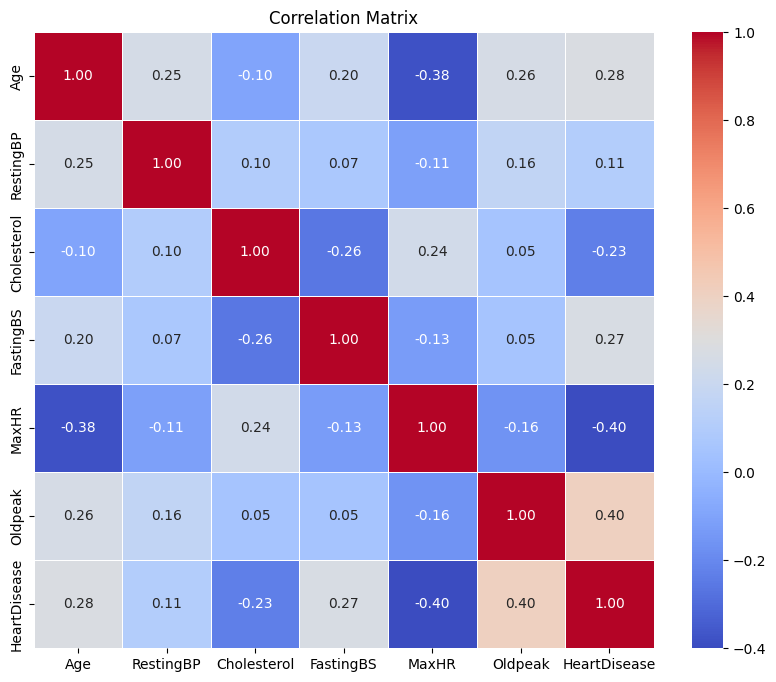

In [6]:
numeric_data = dataset.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

<ipython-input-7-c7f1ce010ec9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y='Cholesterol', data=dataset, palette='Set3')


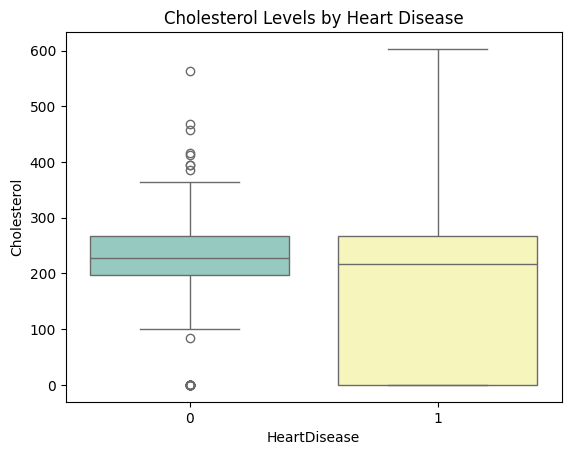

In [7]:
sns.boxplot(x='HeartDisease', y='Cholesterol', data=dataset, palette='Set3')
plt.title("Cholesterol Levels by Heart Disease")
plt.show()


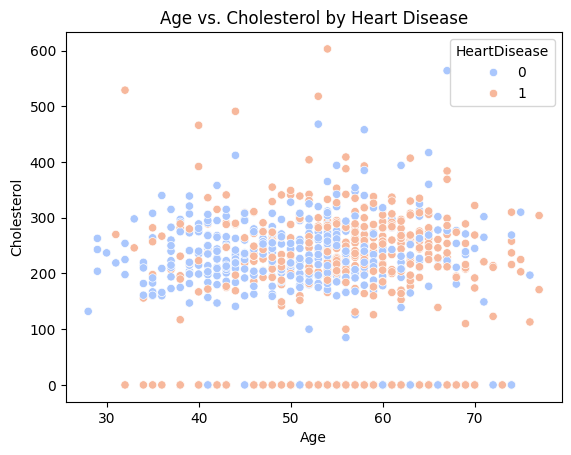

In [8]:
sns.scatterplot(x='Age', y='Cholesterol', hue='HeartDisease', data=dataset, palette='coolwarm')
plt.title("Age vs. Cholesterol by Heart Disease")
plt.show()


## Data Preprocessing

In [9]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

encoded = encoder.fit_transform(dataset[[
    "Sex",
    "ChestPainType",
    "RestingECG",
    "ExerciseAngina",
    "ST_Slope"
]])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out([
    "Sex",
    "ChestPainType",
    "RestingECG",
    "ExerciseAngina",
    "ST_Slope"
]))

dataset = pd.concat([dataset, encoded_df], axis=1)

dataset = dataset.drop(columns=[
    "Sex",
    "ChestPainType",
    "RestingECG",
    "ExerciseAngina",
    "ST_Slope"
], axis=1)

dataset.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


## Data Scaling

In [10]:
X = dataset.drop(columns="HeartDisease")
y = dataset["HeartDisease"]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 0.99902384,  0.37641517, -0.04331227, ..., -0.26452003,
        -1.03325003,  1.17935554],
       [-0.06959099,  0.64776533,  2.94347064, ..., -0.26452003,
         0.96781995, -0.84792072],
       [ 1.2127468 ,  1.46181581, -1.84647842, ..., -0.26452003,
         0.96781995, -0.84792072],
       ...,
       [ 1.10588532,  0.4306852 ,  0.40979102, ..., -0.26452003,
         0.96781995, -0.84792072],
       [-0.49703693, -0.16628515,  0.61322515, ..., -0.26452003,
        -1.03325003,  1.17935554],
       [ 1.10588532,  0.5934953 , -1.84647842, ..., -0.26452003,
         0.96781995, -0.84792072]])

## Building Modals


In [27]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

### Random Forest Classifier

In [28]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [29]:
print("Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Metrics:
Accuracy: 0.8804347826086957
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86        77
           1       0.90      0.89      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

Confusion Matrix:
 [[67 10]
 [12 95]]


### Logistic Regression

In [30]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Metrics:
Accuracy: 0.8532608695652174
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



## SVM

In [32]:
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [33]:
print("\nSVM Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Metrics:
Accuracy: 0.6902173913043478
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.70      0.65        77
           1       0.76      0.68      0.72       107

    accuracy                           0.69       184
   macro avg       0.69      0.69      0.69       184
weighted avg       0.70      0.69      0.69       184

